<font color="darkred">

# Example 2-1: Classifying newswires

## The Reuters dataset

- 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합
- 46개의 토픽으로 분류하는 문제 

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

<font color=blue>
TO DO: 총 몇 개의 샘플이 train data와 test data에 포함되어 있는가?

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

- IMDB movie review data처럼 각 샘플은 단어를 나타내는 인덱스로 이루어짐

<font color=blue>
TO DO: 첫 번째 (index=0) 샘플의 기사를 단어로 디코딩 하고 해당 기사의 topic 레이블을 프린트 하시오.

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

Here's how you can decode it back to words, in case you are curious:

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[0]

3

## Preparing the data

<font color=blue>
TO DO: `train_data`와 `test_data`의 샘플들을 각 단어를 나타내는 one-hot vector의 시퀀스로 변환하여 neural network의 입력 데이터의 형태로 만들고  `x_train`과 `x_test`의 이름으로 저장하시오.

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

<font color=blue>
TO DO: `train_labels`와 `test_labels`를 46개의 범주를 구분하는 one-hot encoding으로 변환하시오. (참고: Lecture 1의 MNIST data)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [13]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building our network

- Output의 dimension이 46개이기 때문에 IMDB 데이터의 2개보다 훨씬 큼
- IMDB 모형보다는 더 많은 node를 가진 layer를 사용하는 것이 나음 


<font color=blue>
TO DO: 아래의 설명에 따라 모형을 만드시오.

- 64개의 node를 가지는 dense layer를 2개 사용. 각 layer는 ReLU activation 적용
- Output layer는 softmax activation 사용


In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

<font color=blue>
TO DO: `rmsprop` optimizer와 적절한 loss 함수를 사용하여  model을 compile 하시오.

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach


In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

<font color=blue>
TO DO: `partial_x_train`, `partial_y_train`을 train data로, `x_val`, `y_val`을 validation data로 사용하여 모델을 학습하고 최적의 epoch 수를 찾으시오. 

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 258us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

Let's display its loss and accuracy curves:

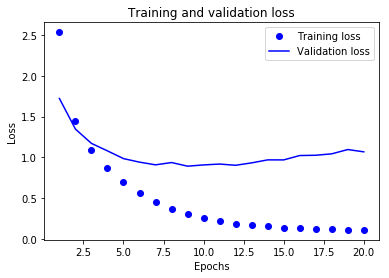

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

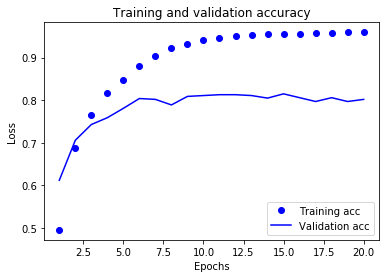

In [15]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<font color=blue>
TO DO: 최적의 epoch 수만큼 model을 다시 학습시키고 test set에 대해 model의 loss와 accuracy를 계산하시오.


In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 96us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/8
7982/7982 [==============================] - 1s 77us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 75us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/8
7982/7982 [==============================] - 1s 76us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/8
7982/7982 [==============================] - 1s 76us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/8
7982/7982 [==============================] - 1s 76us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/8
7982/7982 [==============================] - 1s 75us/step - loss: 0.4124 - acc: 0.9139 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/8
2246

In [17]:
results

[0.9844293454239014, 0.7836153161175423]

<font color=blue>
TO DO: `x_test`의 첫 번째 기사는 모형에 의해 몇 번째 topic으로 분류되었는가? 실제로는 몇 번째 topic에 해당하는 기사인가? 


In [18]:
predictions = model.predict(x_test)

In [19]:
np.argmax(predictions[0])

3

In [20]:
test_labels[0]

3

<font color=blue>
TO DO: 다음의 변화를 시도하며 모형 성능이 어떻게 변하는지 관찰하고 test accuracy를 가장 크게 만드는 모형을 report 하시오. 
- 각 층의 node의 개수를 크게 혹은 작게 변화(32, 128 등) 
- Hidden layer의 수를 조정 (1개, 3개 등)

In [ ]:
import keras.backend as K

import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [44]:
from keras.layers import Dropout

K.clear_session()
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
#model.add(Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
#model.add(Dropout(0.5))
#model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

now = time.strftime("%c")
callbacks_list = [
#   EarlyStopping(monitor='val_loss',patience=1),
    ModelCheckpoint(filepath='models/newswire_128_256_adam'+now+'.h5',monitor='val_loss',save_best_only=True),
    TensorBoard(log_dir='./logs/newswire/128_256_adam'+now, histogram_freq=1)
]

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val),
          callbacks=callbacks_list
         )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.9210 - acc: 0.6131 - val_loss: 1.1477 - val_acc: 0.7410
Epoch 2/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.8150 - acc: 0.8187 - val_loss: 0.9210 - val_acc: 0.8040
Epoch 3/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.4161 - acc: 0.9095 - val_loss: 0.8397 - val_acc: 0.8200
Epoch 4/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.2481 - acc: 0.9422 - val_loss: 0.8698 - val_acc: 0.8190
Epoch 5/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.1965 - acc: 0.9510 - val_loss: 0.8441 - val_acc: 0.8220
Epoch 6/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.1567 - acc: 0.9538 - val_loss: 0.8680 - val_acc: 0.8190
Epoch 7/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.1449 - acc: 0.9555 - val_loss: 0.9061 - val_acc: 0.8090
Epoch 8

In [46]:
from keras.models import load_model
final_model=load_model('models/newswire_128_256_adamFri Mar 29 21:00:46 2019.h5')

In [47]:
results = final_model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 113us/step


In [48]:
results

[0.9217482814805803, 0.7956366874974218]

In [50]:
predictions = final_model.predict(x_test)